In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

## Group Assignment
### Team Number: [Number]
### Team Member Names: Arya Patel, Saihej Singh, Matthew Gong
### Team Strategy Chosen: RISKY

In [2]:
# Replace 'Tickers_Example.csv' with the actual ticker CSV file
ticker_file = 'Tickers_Example.csv'

# Read the CSV file into a pandas DataFrame with a single column
tickers_df = pd.read_csv(ticker_file, header=None, names=['Tickers'])

# Set the single column as the index
tickers_df.set_index('Tickers', inplace=True)

# Create an info cell for each ticker, saving time when filtering the tickers by volume and country.
info_column = {}
hist_column = {}
long_hist_column = {}
ticker_obj_lst = []

long_start_date = "2018-10-31"
start_date = "2023-01-01"
end_date = "2023-10-31"

tickers_df = tickers_df[~tickers_df.index.duplicated(keep='first')]
# Add info to dict
for ticker in tickers_df.index:
    yf_ticker = yf.Ticker(ticker)
    info_column[ticker] = yf_ticker.fast_info
    hist_column[ticker] = yf_ticker.history(start=start_date, end=end_date)
    long_hist_column[ticker] = yf_ticker.history(start=long_start_date, end=end_date)
    print('.', end='') # So we can tell if the code is running

# Create column for the info]
tickers_df['Info'] = pd.Series(info_column)
tickers_df['History'] = pd.Series(hist_column)
tickers_df['Long History'] = pd.Series(long_hist_column)
tickers_df

...

AGN: No timezone found, symbol may be delisted
AGN: No timezone found, symbol may be delisted


............

CELG: No timezone found, symbol may be delisted
CELG: No timezone found, symbol may be delisted


......

MON: No timezone found, symbol may be delisted
MON: No timezone found, symbol may be delisted


........

RTN: No timezone found, symbol may be delisted
RTN: No timezone found, symbol may be delisted


...........

,Info,History,Long History
Tickers,,,
AAPL,"lazy-loading dict with keys = ['currency', 'da...",Open H...,Open H...
ABBV,"lazy-loading dict with keys = ['currency', 'da...",Open H...,Open H...
ABT,"lazy-loading dict with keys = ['currency', 'da...",Open H...,Open Hig...
ACN,"lazy-loading dict with keys = ['currency', 'da...",Open H...,Open H...
AGN,"lazy-loading dict with keys = ['currency', 'da...","Empty DataFrame Columns: [Open, High, Low, Clo...","Empty DataFrame Columns: [Open, High, Low, Clo..."
AIG,"lazy-loading dict with keys = ['currency', 'da...",Open Hig...,Open Hig...
AMZN,"lazy-loading dict with keys = ['currency', 'da...",Open H...,Open H...
AXP,"lazy-loading dict with keys = ['currency', 'da...",Open H...,Open H...
BA,"lazy-loading dict with keys = ['currency', 'da...",Open H...,Open H...


In [3]:
minVolume = 150000
allowed_currencies = ["USD", "CAD"]
threshold_day = 18
days_in_month = []

CAD_stocks = []
USD_stocks = []
all_stocks = []

for ticker in tickers_df.index:
    if tickers_df['History'][ticker].empty:
        print(ticker, "is delisted.")
    else:
        group_months = tickers_df["History"][ticker].reset_index().groupby(pd.Grouper(key="Date", freq='M'))
        dfs = [group for _, group in group_months]
        for i, df in enumerate(dfs):
            #recombine all the months with more trading days than set threshold
            if len(df.index) >= threshold_day:
                days_in_month.append(len(df.index))

        if tickers_df['Info'][ticker]['currency'] not in allowed_currencies:
            print(ticker, "is not in USD or CAD")
        elif tickers_df['History'][ticker]['Volume'].mean() * (np.mean(days_in_month)) < minVolume:
            print(ticker, "only has a volume of", tickers_df.iloc['Info'][ticker]['lastVolume'], "and average days of", np.mean(days_in_month))
        else:
            all_stocks.append(ticker)
            if tickers_df['Info'][ticker]['currency'] == 'USD':
                USD_stocks.append(ticker)
            elif tickers_df['Info'][ticker]['currency'] == 'CAD':
                CAD_stocks.append(ticker)
                                
print("\nValid CAD Stocks:\n",CAD_stocks)
print("\nValid USD Stocks:\n",USD_stocks)
print("\nValid All Valid Stocks:\n", all_stocks)

AGN is delisted.
CELG is delisted.
MON is delisted.
RTN is delisted.

Valid CAD Stocks:
 ['RY.TO', 'SHOP.TO', 'T.TO', 'TD.TO']

Valid USD Stocks:
 ['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CL', 'KO', 'LLY', 'LMT', 'MO', 'MRK', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'TXN', 'UNH', 'UNP', 'UPS', 'USB']

Valid All Valid Stocks:
 ['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CL', 'KO', 'LLY', 'LMT', 'MO', 'MRK', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RY.TO', 'SHOP.TO', 'T.TO', 'TD.TO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB']


In [4]:
stock_stds = []
stocks_df = pd.DataFrame()

##Retreiving CADUSD currency conversion data
exchange = yf.Ticker('CADUSD=x')
exchange_hist = exchange.history(start=start_date, end=end_date)

exchange_hist.index = pd.to_datetime(exchange_hist.index)
exchange_hist.index = exchange_hist.index.date

##Debugging
# print(tickers_df['History']['AAPL']['Close'].iloc[0])
# print(exchange_hist.Close.iloc[1])
# print(tickers_df['History']['AAPL']['Close'].iloc[0] * (1/exchange_hist.Close.iloc[1]))

##Creating dataframe for all stocks closing prices in CAD
for ticker in all_stocks:
    currCurrency = tickers_df['Info'][ticker]['currency']
    currClose = tickers_df['History'][ticker]['Close']
    
    ##changing stock index to match with CADUSD conversion index
    currClose.index = pd.to_datetime(currClose.index)
    currClose.index = currClose.index.date
    
    ##make sure all stocks are priced in CAD
    if currCurrency == "USD":                                       
        stocks_df[ticker] = currClose * (1/exchange_hist.Close)
    else:
        stocks_df[ticker] = currClose
        
    ##Making list of 
    stocks_df = stocks_df.dropna()
    
stocks_df
##reason to keep all stocks in the same currency is to increase accuracy of the correlation calculations

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,QCOM,RY.TO,SHOP.TO,T.TO,TD.TO,TXN,UNH,UNP,UPS,USB
2023-01-03,168.639803,211.621955,145.665504,360.714605,83.711194,116.363344,196.572718,264.929315,44.415907,369.659044,...,142.464875,122.739273,48.790001,25.214359,84.689217,214.563573,695.157322,276.074070,228.572651,57.969782
2023-01-04,171.825503,215.140095,149.087190,362.538230,85.669408,116.421281,202.849763,278.459358,45.635063,370.308280,...,149.477481,123.832176,50.610001,25.520916,85.790459,224.286735,681.944918,280.644092,232.919616,60.282250
2023-01-05,167.653603,211.907267,146.484490,349.084989,84.022264,112.088154,195.258901,276.431070,44.912033,366.241823,...,144.596183,123.467873,48.830002,25.492176,84.384224,218.257955,653.136789,268.617178,225.459282,58.984097
2023-01-06,174.786446,217.070924,149.331011,359.336990,85.871867,116.723626,201.356783,288.825880,45.611842,378.660220,...,153.292806,125.040092,49.560001,25.884954,84.345154,230.288868,656.813348,281.984519,233.373985,60.142445
2023-01-09,173.887198,208.759944,147.720640,362.036668,84.185863,117.369912,199.810640,280.217986,44.509437,369.091829,...,150.921812,125.970016,49.810001,25.827473,84.081490,230.151077,650.852846,278.666550,234.768300,59.975385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-24,237.100988,200.276445,129.780668,405.302802,81.953050,175.979357,197.689320,249.623493,34.864609,345.100783,...,149.738504,109.029999,71.870003,22.360001,76.830002,199.284689,718.646268,281.216554,202.030681,42.968202
2023-10-25,234.809448,199.610478,128.580154,402.189148,83.768794,166.809285,197.219453,244.229456,35.109788,339.032764,...,143.984486,109.110001,66.900002,22.280001,76.919998,193.072336,728.593420,282.005123,199.568144,42.997469
2023-10-26,230.053533,200.418114,129.719665,403.099924,83.990649,165.041283,197.850774,247.196144,36.053178,332.760333,...,145.786241,110.209999,64.529999,22.320000,77.410004,196.970043,729.290041,279.149871,188.561638,43.851816
2023-10-27,232.073362,191.917889,128.262986,400.661261,82.234739,176.460030,195.205627,248.223765,34.769838,323.965929,...,147.063840,108.470001,64.349998,22.010000,76.160004,195.910134,724.765275,278.656005,184.098169,42.326094


In [5]:
##std-dataframe function

def getStds(dataframe):
    
    ##define variables
    stock_stds = []
    stock_list = sorted(dataframe)
    
    ##append each stock's percent std to a list
    for stock in stock_list:
        currPctChange = dataframe[stock].pct_change() * 100
        stock_stds.append(currPctChange.std())
        
    ##make dataframe with stock names as indexes with their associated std vlaue   
    stock_stds = pd.DataFrame(stock_stds, columns=['stds'])
    stock_stds.index = stock_list
    
    return stock_stds
    
    
stds = getStds(stocks_df)
stds

,stds
AAPL,1.340555
ABBV,1.339442
ABT,1.310785
ACN,1.503596
AIG,1.798249
AMZN,2.207021
AXP,1.714515
BA,1.801327
BAC,1.666901
BIIB,1.344842


## Compare highest std to lowest std stock graphs and analyze why it is useful:

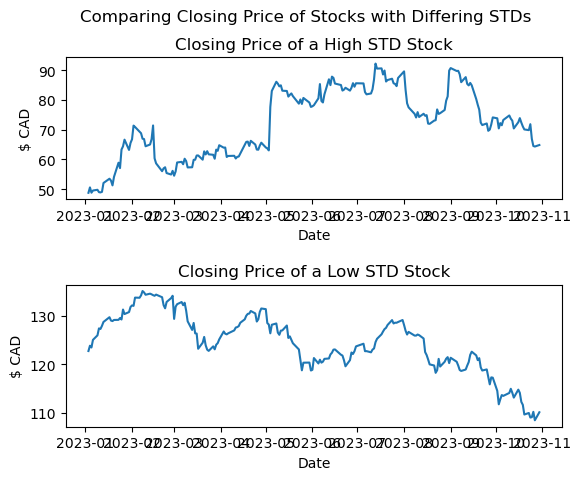

In [6]:
maxStd = max(stds['stds'])
minStd = min(stds['stds'])

maxStdStock = stds[stds['stds']==maxStd].index.values[0]
minStdStock = stds[stds['stds']==minStd].index.values[0]

##Graphs
fig, ((ax1), (ax2)) = plt.subplots(2, 1)

## Overall title
fig.suptitle('Comparing Closing Price of Stocks with Differing STDs')

## Subplot titles
ax1.set_title("Closing Price of a High STD Stock")
ax2.set_title("Closing Price of a Low STD Stock")

# Formatting subplots
plt.subplots_adjust(hspace=0.6)


# Subplot 1 
ax1.plot(stocks_df.index, stocks_df[maxStdStock])

# Subplot 2
ax2.plot(stocks_df.index, stocks_df[minStdStock])

# Labels
ax1.set_ylabel("$ CAD")
ax2.set_ylabel("$ CAD")

ax1.set_xlabel("Date")
ax2.set_xlabel("Date")

plt.show()

In [20]:
marketTicker = yf.Ticker("^GSPC")
marketHist = marketTicker.history(start=long_start_date, end=end_date)

beta = {}

def beta_volatility(ticker):
    prices = pd.DataFrame(tickers_df["Long History"][ticker]["Close"])
    prices.columns = [ticker]
    prices["Market"] = marketHist['Close']

    monthly_change = prices.resample("M").ffill().pct_change()
    monthly_change = monthly_change.drop(index=monthly_change.index[0])

    return (monthly_change.cov()/monthly_change["Market"].var()).iat[0, 1]


for ticker in (CAD_stocks + USD_stocks):
    beta[ticker] = beta_volatility(ticker)

sorted_BTlist = sorted(beta.items(), key=lambda x:x[1], reverse=True)
sorted_BTlist


[('SHOP.TO', 1.8105683661552794),
 ('C', 1.5566633839017536),
 ('BA', 1.4762120588273269),
 ('BAC', 1.385100501939429),
 ('PYPL', 1.3792816900669551),
 ('AAPL', 1.3036337561501505),
 ('BLK', 1.283591579683102),
 ('ACN', 1.2304504773726077),
 ('QCOM', 1.2167448188381336),
 ('AXP', 1.2146614187848406),
 ('AMZN', 1.1719942897819302),
 ('UPS', 1.1049482223669973),
 ('UNP', 1.102518400404991),
 ('BK', 1.0953392288814356),
 ('CAT', 1.0879429704052508),
 ('AIG', 1.0351016853502857),
 ('USB', 1.0267304430767046),
 ('TXN', 1.0168274944550288),
 ('PM', 0.776692793440364),
 ('ABT', 0.6933944433764103),
 ('MO', 0.6535229783244033),
 ('TD.TO', 0.6386754192009365),
 ('UNH', 0.63211352001165),
 ('PFE', 0.6305326237635515),
 ('LMT', 0.5987250329412025),
 ('KO', 0.5908104073512255),
 ('PEP', 0.5726421514452057),
 ('RY.TO', 0.5664452139083009),
 ('ABBV', 0.5070229621503105),
 ('PG', 0.4747916523949348),
 ('CL', 0.4606662673161343),
 ('T.TO', 0.459669424488048),
 ('BMY', 0.3853927500665917),
 ('MRK', 0.3

In [58]:
top10Beta = list(sorted_BTlist)[:10]
top10Beta_vals = []
top10Beta_stocks = []

for i in range(len(top10Beta)):
    top10Beta_stocks.append(top10Beta[i][0])
    top10Beta_vals.append(top10Beta[i][1])
    
top10Beta_stocks
top10Beta_vals

['SHOP.TO', 'C', 'BA', 'BAC', 'PYPL', 'AAPL', 'BLK', 'ACN', 'QCOM', 'AXP']

In [79]:
stocks_corr = stocks_df.corr()

# Create a dictionary of stock pairs and their correlation coefficients
correlation_dict = {}
for i in range(len(stocks_corr.columns)):
    for j in range(i + 1, len(stocks_corr.columns)):
        stock_pair = (stocks_corr.columns[i], stocks_corr.columns[j])
        correlation_coefficient = stocks_corr.iloc[i, j]
        correlation_dict[stock_pair] = correlation_coefficient

# Sort the dictionary based on correlation coefficients
sorted_corrPairsDict = dict(sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True))

stocks_corr

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,QCOM,RY.TO,SHOP.TO,T.TO,TD.TO,TXN,UNH,UNP,UPS,USB
AAPL,1.000000,-0.412003,-0.236540,0.765406,-0.098706,0.859363,0.028720,0.146018,-0.660112,-0.143137,...,-0.335481,-0.500902,0.871692,-0.589936,-0.414228,-0.166168,0.126990,0.347555,-0.301694,-0.693244
ABBV,-0.412003,1.000000,-0.159572,-0.308239,-0.044701,-0.326484,-0.296632,-0.063601,0.054739,-0.272347,...,-0.010159,0.064396,-0.619952,0.070569,0.029613,-0.096470,0.430204,0.099806,0.146268,0.182809
ABT,-0.236540,-0.159572,1.000000,-0.240977,-0.033423,-0.280658,0.034817,0.385251,0.465346,0.494454,...,0.127127,0.617423,0.014768,0.495271,0.478486,0.315726,-0.400823,0.026774,0.391726,0.281650
ACN,0.765406,-0.308239,-0.240977,1.000000,0.393938,0.917357,-0.051855,0.226013,-0.362580,-0.361674,...,-0.262088,-0.598875,0.706022,-0.791494,-0.143367,-0.253021,0.258312,0.623629,-0.511331,-0.337330
AIG,-0.098706,-0.044701,-0.033423,0.393938,1.000000,0.279757,-0.080478,-0.017821,0.406785,-0.484972,...,-0.007211,-0.205083,-0.022311,-0.530876,0.540119,-0.435777,0.336219,0.578206,-0.522299,0.486618
AMZN,0.859363,-0.326484,-0.280658,0.917357,0.279757,1.000000,-0.108879,0.167480,-0.519679,-0.372002,...,-0.400675,-0.651628,0.786403,-0.813472,-0.254314,-0.363119,0.258587,0.597491,-0.562093,-0.493526
AXP,0.028720,-0.296632,0.034817,-0.051855,-0.080478,-0.108879,1.000000,0.423365,0.472462,0.023059,...,0.649931,0.548250,0.095058,0.204307,0.395757,0.604372,-0.494091,-0.063453,0.552565,0.411628
BA,0.146018,-0.063601,0.385251,0.226013,-0.017821,0.167480,0.423365,1.000000,0.331519,0.017283,...,0.286680,0.380515,0.208805,-0.026178,0.343799,0.513982,-0.351619,0.490339,0.457462,0.280385
BAC,-0.660112,0.054739,0.465346,-0.362580,0.406785,-0.519679,0.472462,0.331519,1.000000,0.030572,...,0.633280,0.727113,-0.442652,0.367238,0.873504,0.390425,-0.290293,0.084127,0.427205,0.947259
BIIB,-0.143137,-0.272347,0.494454,-0.361674,-0.484972,-0.372002,0.023059,0.017283,0.030572,1.000000,...,-0.045769,0.387730,0.050838,0.702429,-0.078764,0.230525,-0.347801,-0.553590,0.287933,-0.192044


In [80]:
sorted_corrPairsDict

{('BK', 'USB'): 0.9497088092808195,
 ('BAC', 'USB'): 0.9472593930381241,
 ('ACN', 'AMZN'): 0.9173569897064298,
 ('BMY', 'PFE'): 0.9091023159319379,
 ('BMY', 'T.TO'): 0.8971129100803077,
 ('AMZN', 'LLY'): 0.8906843493457195,
 ('BAC', 'BK'): 0.8850726815881204,
 ('C', 'RY.TO'): 0.8832896132565906,
 ('BAC', 'TD.TO'): 0.8735038628841301,
 ('AAPL', 'SHOP.TO'): 0.8716919739532412,
 ('AAPL', 'AMZN'): 0.8593625143248832,
 ('TXN', 'UPS'): 0.858665452379491,
 ('PYPL', 'RY.TO'): 0.8567695352925104,
 ('BMY', 'PYPL'): 0.8500688909194938,
 ('TD.TO', 'USB'): 0.8413447447835528,
 ('ACN', 'LLY'): 0.8226562644900574,
 ('CAT', 'UNP'): 0.8226188816629253,
 ('PFE', 'PYPL'): 0.8131924246902107,
 ('C', 'PYPL'): 0.8057025800842248,
 ('KO', 'PEP'): 0.7985860500718044,
 ('BMY', 'C'): 0.7970324907455942,
 ('BMY', 'RY.TO'): 0.7931771693454192,
 ('PYPL', 'UPS'): 0.7864928370777358,
 ('AMZN', 'SHOP.TO'): 0.7864033465013135,
 ('RY.TO', 'UPS'): 0.7777792695156607,
 ('BK', 'TD.TO'): 0.7729276601135026,
 ('PYPL', 'T.TO

In [113]:
top10Beta_stocks
top10Beta_vals

allPorts = []
allPortCorrAvgs = []

##for the top 10 highest beta stocks
for stock in top10Beta_stocks:
    
    tempPort = [stock]
    tempCorr=0
    tempCorrSum = 0
    tempCorrAvg = []

    
    ##for each possible correlation given all the stocks
    ##correlations are sorted from highest to lowest
    for item in sorted_corrPairsDict:   
        
        if (item[0]==stock):
            tempPort.append(item[1])
            tempCorr = stocks_corr._get_value(stock, item[1])
            tempCorrSum += tempCorr
            
        elif (item[1]==stock):
            tempPort.append(item[0])
            tempCorr = stocks_corr._get_value(stock, item[0])
            tempCorrSum += tempCorr

        if (len(tempPort) > 10):
            allPorts.append(tempPort)
            tempCorrAvg = tempCorrSum/9
            allPortCorrAvgs.append(tempCorrAvg)
            
            break;
            ##then goes to the next highest beta stock

  
highestCorr = max(allPortCorrAvgs)
bestPortIndex = allPortCorrAvgs.index(highestCorr)
bestPortfolio = allPorts[bestPortIndex]
            
print("All Portfolios: \n", allPorts, "\n")
print("All Correlation Averages (to the main stock): \n", allPortCorrAvgs, "\n")
print("Most Correlated Portfolio: \n", bestPortfolio, "\n")
print("Avg Correlation of Most Correlated Portfolio: \n", max(allPortCorrAvgs), "\n")





All Portfolios: 
 [['SHOP.TO', 'AAPL', 'AMZN', 'ACN', 'LLY', 'PEP', 'PG', 'UNP', 'CAT', 'BA', 'CL'], ['C', 'RY.TO', 'PYPL', 'BMY', 'T.TO', 'BAC', 'PFE', 'UPS', 'QCOM', 'BK', 'USB'], ['BA', 'TXN', 'BLK', 'UNP', 'UPS', 'AXP', 'ABT', 'KO', 'RY.TO', 'PEP', 'TD.TO'], ['BAC', 'USB', 'BK', 'TD.TO', 'BLK', 'C', 'RY.TO', 'PYPL', 'PFE', 'PM', 'QCOM'], ['PYPL', 'RY.TO', 'BMY', 'PFE', 'C', 'UPS', 'T.TO', 'QCOM', 'BAC', 'TXN', 'PM'], ['AAPL', 'SHOP.TO', 'AMZN', 'ACN', 'LLY', 'PG', 'PEP', 'UNP', 'CAT', 'BA', 'UNH'], ['BLK', 'BAC', 'TD.TO', 'USB', 'BK', 'ABT', 'PM', 'QCOM', 'PYPL', 'RY.TO', 'BA'], ['ACN', 'AMZN', 'LLY', 'AAPL', 'SHOP.TO', 'CAT', 'UNP', 'PG', 'AIG', 'UNH', 'BA'], ['QCOM', 'PYPL', 'BK', 'AXP', 'USB', 'BAC', 'TXN', 'C', 'UPS', 'RY.TO', 'BLK'], ['AXP', 'QCOM', 'TXN', 'C', 'UPS', 'RY.TO', 'BK', 'BAC', 'PYPL', 'BA', 'USB']] 

All Correlation Averages (to the main stock): 
 [0.5050726490294144, 0.8028844468240127, 0.4691068366918861, 0.8469298457683235, 0.8470973309282773, 0.549660995469016

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Insert Names Here.